<a href="https://colab.research.google.com/github/AmiraliEsi83/ImageNet-data-base/blob/main/resnet50_on_imagenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=aaf64ed5a26b44c8a5fe7f776a0ac238e3fb95807bdfcd7fe1e9b832379280ea
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [2]:
import os, sys, wget
from zipfile import ZipFile
url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
tiny_imgdataset = wget.download('http://cs231n.stanford.edu/tiny-imagenet-200.zip', out = os.getcwd())
for file in os.listdir(os.getcwd()):
    if file.endswith(".zip"):
        zip = ZipFile(file)
        zip.extractall()
    else:
        print("not found")

not found
not found


In [3]:
import tensorflow as tf
import tensorflow_hub as hub

In [4]:
# check for gpu avaiability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


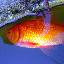

In [5]:
from IPython.display import Image
Image('/content/tiny-imagenet-200/train/n01443537/images/n01443537_100.JPEG')

In [6]:
import os
f = open('/content/tiny-imagenet-200/wnids.txt')
all_files = [fn.strip() for fn in f.readlines()]
all_files
len(all_files)

200

In [7]:
file_names = ['/content/tiny-imagenet-200/train/'+fn+'/images/'+fn+'_' for fn in all_files]
file_names

['/content/tiny-imagenet-200/train/n02124075/images/n02124075_',
 '/content/tiny-imagenet-200/train/n04067472/images/n04067472_',
 '/content/tiny-imagenet-200/train/n04540053/images/n04540053_',
 '/content/tiny-imagenet-200/train/n04099969/images/n04099969_',
 '/content/tiny-imagenet-200/train/n07749582/images/n07749582_',
 '/content/tiny-imagenet-200/train/n01641577/images/n01641577_',
 '/content/tiny-imagenet-200/train/n02802426/images/n02802426_',
 '/content/tiny-imagenet-200/train/n09246464/images/n09246464_',
 '/content/tiny-imagenet-200/train/n07920052/images/n07920052_',
 '/content/tiny-imagenet-200/train/n03970156/images/n03970156_',
 '/content/tiny-imagenet-200/train/n03891332/images/n03891332_',
 '/content/tiny-imagenet-200/train/n02106662/images/n02106662_',
 '/content/tiny-imagenet-200/train/n03201208/images/n03201208_',
 '/content/tiny-imagenet-200/train/n02279972/images/n02279972_',
 '/content/tiny-imagenet-200/train/n02132136/images/n02132136_',
 '/content/tiny-imagenet-

In [8]:
file_names_test = os.listdir('/content/tiny-imagenet-200/test/images')

In [9]:
file_names_test = ['/content/tiny-imagenet-200/test/images/test_'+str(i)+'.JPEG' for i in range(len(file_names_test))]

In [10]:
file_names_test, len(file_names_test)

(['/content/tiny-imagenet-200/test/images/test_0.JPEG',
  '/content/tiny-imagenet-200/test/images/test_1.JPEG',
  '/content/tiny-imagenet-200/test/images/test_2.JPEG',
  '/content/tiny-imagenet-200/test/images/test_3.JPEG',
  '/content/tiny-imagenet-200/test/images/test_4.JPEG',
  '/content/tiny-imagenet-200/test/images/test_5.JPEG',
  '/content/tiny-imagenet-200/test/images/test_6.JPEG',
  '/content/tiny-imagenet-200/test/images/test_7.JPEG',
  '/content/tiny-imagenet-200/test/images/test_8.JPEG',
  '/content/tiny-imagenet-200/test/images/test_9.JPEG',
  '/content/tiny-imagenet-200/test/images/test_10.JPEG',
  '/content/tiny-imagenet-200/test/images/test_11.JPEG',
  '/content/tiny-imagenet-200/test/images/test_12.JPEG',
  '/content/tiny-imagenet-200/test/images/test_13.JPEG',
  '/content/tiny-imagenet-200/test/images/test_14.JPEG',
  '/content/tiny-imagenet-200/test/images/test_15.JPEG',
  '/content/tiny-imagenet-200/test/images/test_16.JPEG',
  '/content/tiny-imagenet-200/test/images

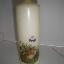

In [11]:
Image(file_names_test[0])

In [12]:
all_pic_path = []
for i in range(len(file_names)):
  for j in range(500):
    all_pic_path.append(file_names[i]+str(i)+'.JPEG')

In [13]:
print(len(all_pic_path))
print(all_pic_path[0])

100000
/content/tiny-imagenet-200/train/n02124075/images/n02124075_0.JPEG


In [14]:
X = all_pic_path

In [15]:
import numpy as np
y = []
for i in range(200):
  y.append([i]*500)

In [16]:
y = np.array(y)
y.shape

(200, 500)

In [17]:
y = y.ravel()
print(len(y))
print(y[500])

100000
1


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
NUM_OF_IMAGES = 1000
X_train, X_val,y_train, y_val = train_test_split(X[:], y[:], test_size =0.2, random_state=42)

In [20]:
len(X_train), len(y_train), len(X_val), len(y_val)

(80000, 80000, 20000, 20000)

In [21]:
print(X_train[0])
print(y_train[0])

/content/tiny-imagenet-200/train/n03355925/images/n03355925_150.JPEG
150


In [22]:
from matplotlib.pyplot import imread

In [23]:
image = imread(X[0])
image.shape

(64, 64, 3)

In [24]:
IMG_SIZE = 224

In [25]:
def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  # scale and normalize values between 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])
  return image

In [26]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return (image,label)

In [27]:
BATCH_SIZE = 32

In [28]:
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data=False):
  if test_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

In [29]:
training_data = create_data_batches(X_train, y_train)

In [30]:
val_data = create_data_batches(X_val, y_val, valid_data=True)

In [31]:
test_data = create_data_batches(file_names_test, test_data=True)

In [32]:
import matplotlib.pyplot as plt

In [33]:
def show_25_images(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(y[i])

In [34]:
training_images, train_labels = next(training_data.as_numpy_iterator())
training_images, train_labels

(array([[[[0.2784314 , 0.18431373, 0.23529413],
          [0.2784314 , 0.18431373, 0.23529413],
          [0.29691878, 0.20532213, 0.24117649],
          ...,
          [0.24145661, 0.21036413, 0.17507   ],
          [0.24313727, 0.20784315, 0.17254902],
          [0.24313727, 0.20784315, 0.17254902]],
 
         [[0.2784314 , 0.18431373, 0.23529413],
          [0.2784314 , 0.18431373, 0.23529413],
          [0.29691878, 0.20532213, 0.24117649],
          ...,
          [0.24145661, 0.21036413, 0.17507   ],
          [0.24313727, 0.20784315, 0.17254902],
          [0.24313727, 0.20784315, 0.17254902]],
 
         [[0.2784314 , 0.18767507, 0.22857144],
          [0.2784314 , 0.18767507, 0.22857144],
          [0.29709885, 0.20868348, 0.23499401],
          ...,
          [0.23605447, 0.20844337, 0.17218885],
          [0.23809525, 0.20700282, 0.17002802],
          [0.23809525, 0.20700282, 0.17002802]],
 
         ...,
 
         [[0.54733914, 0.37422985, 0.30056036],
          [0.54733

In [35]:
len(training_images),len(train_labels)

(32, 32)

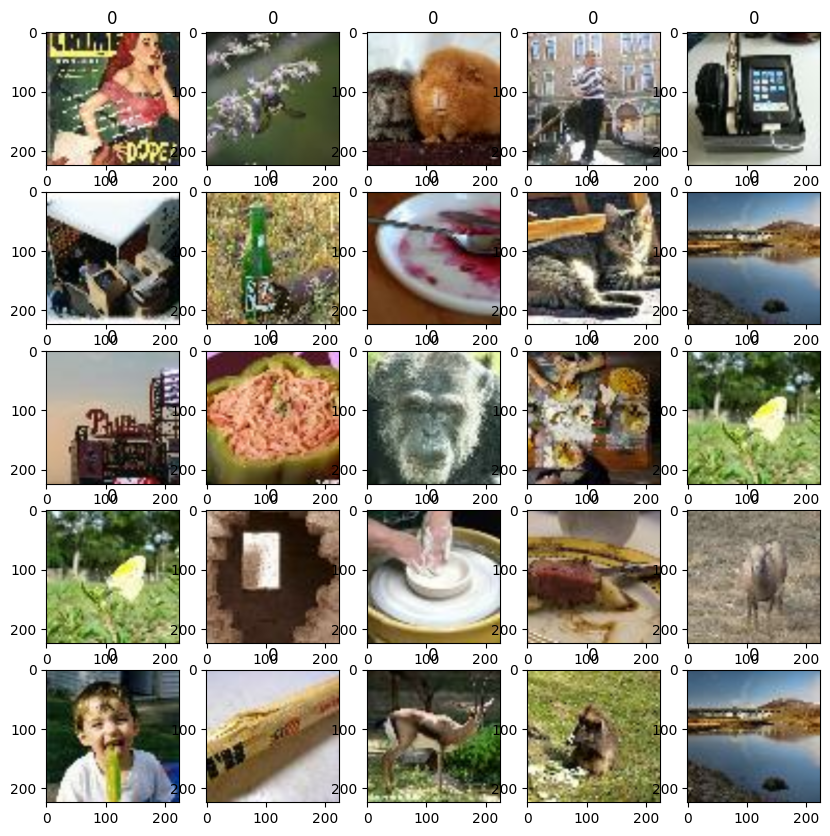

In [36]:
show_25_images(training_images, train_labels)

In [37]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE = 200

In [38]:
renet_50 = 'https://tfhub.dev/google/supcon/resnet_v1_50/imagenet/classification/1'
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

In [39]:
model = tf.keras.Sequential([
  hub.KerasLayer(renet_50),
  tf.keras.layers.Dense(200)
])
model.build(INPUT_SHAPE)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              25872296  
                                                                 
 dense (Dense)               (None, 200)               200200    
                                                                 
Total params: 26,072,496
Trainable params: 200,200
Non-trainable params: 25,872,296
_________________________________________________________________


In [40]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])



In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              25872296  
                                                                 
 dense (Dense)               (None, 200)               200200    
                                                                 
Total params: 26,072,496
Trainable params: 200,200
Non-trainable params: 25,872,296
_________________________________________________________________


In [42]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

In [43]:
model.fit(x=training_data,epochs=1, validation_data=val_data, validation_freq=1, callbacks=early_stopping)

2500/2500 [==============================] - ETA: 0s - loss: 0.1291 - acc: 0.9833

2500/2500 [==============================] - 374s 145ms/step - loss: 0.1291 - acc: 0.9833 - val_loss: 0.0020 - val_acc: 1.0000
